#### PCA, Hierarchical clustering and plotting
In this notebook, we performed a pca dimension reduction, continued with a hierarchical clustering and plotted the results for different datasets.

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import data_exploration as de
import data_cleanup as dc
import scipy.stats as stats

In [3]:
aa = pd.read_csv('../DMS_data/aminoacids.csv')
gia_null_eto: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv')
betalac: pd.DataFrame = pd.read_csv('../DMS_data/BLAT_ECOLX_Stiffler_2015.csv')

#Data cleaning
norm_frame_p53 = dc.aufteilung_mut_pos(dc.norm(gia_null_eto))

norm_frame_betalac = dc.aufteilung_mut_pos(dc.norm(betalac))

In [4]:
dist_wt_p53 = de.dms_distance_matrix_wt(norm_frame_p53)
dist_mut_p53 = de.dms_distance_matrix_mutated(norm_frame_p53)

dist_mut_betalac = de.dms_distance_matrix_wt(norm_frame_betalac)
dist_wt_betalac = de.dms_distance_matrix_mutated(norm_frame_betalac)

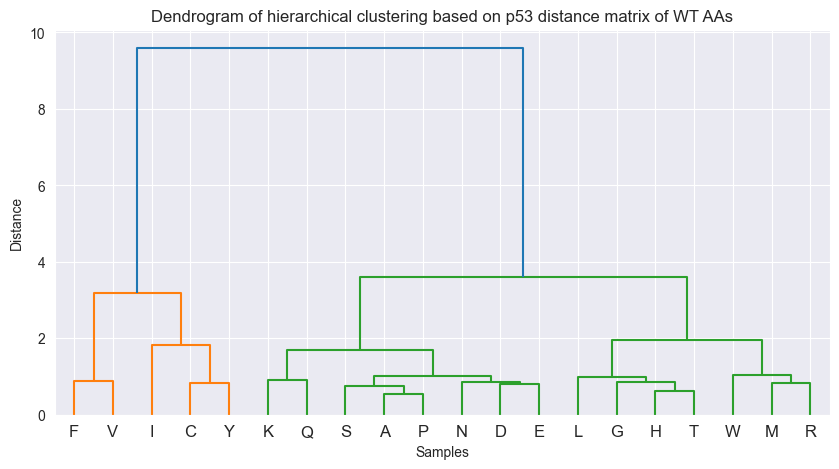

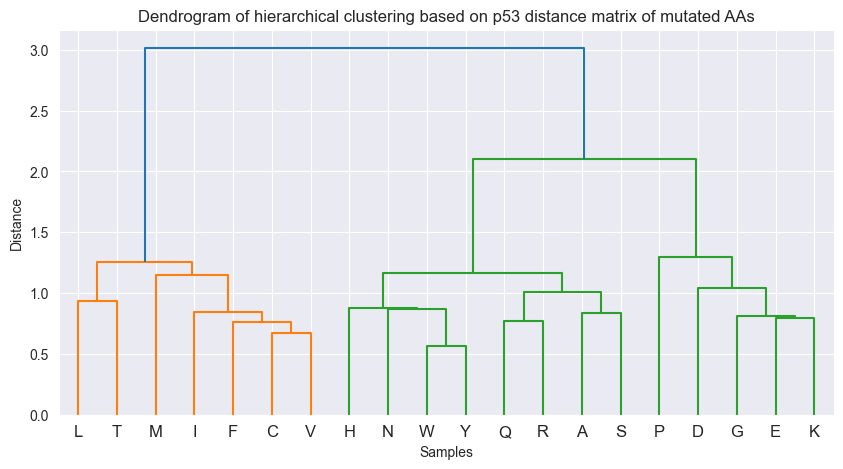

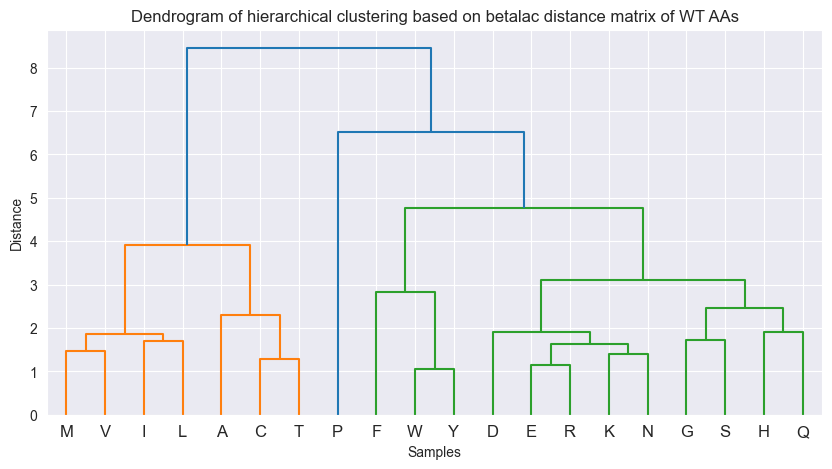

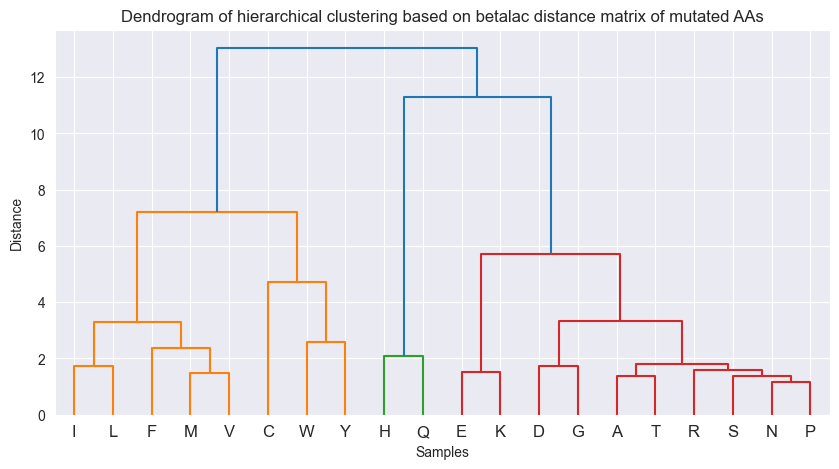

In [5]:
# hierarchical ward clustering
de.plot_hier_clust(dist_wt_p53, title = "p53 distance matrix of WT AAs")
de.plot_hier_clust(dist_mut_p53, title = "p53 distance matrix of mutated AAs")

de.plot_hier_clust(dist_wt_betalac, title = "betalac distance matrix of WT AAs")
de.plot_hier_clust(dist_mut_betalac, title = "betalac distance matrix of mutated AAs")

In [10]:
#determine optimal amount of clusters. Algorithm not optimized, but quite a good estimation
clusters_by_sil_p53 = de.determine_clusters_silhouette(dc.rmv_na(dc.df_transform(norm_frame_p53)))
#clusters_by_sil_betalac = de.determine_clusters_silhouette(dc.rmv_na(dc.df_transform(norm_frame_betalac)))
# does not work here, because dataset contains missing values outside of those, that are supposed to be zero (e.g. distance from E to E is always NaN)

print (clusters_by_sil_p53)
print ("---")
#print (clusters_by_sil_betalac)

6
---


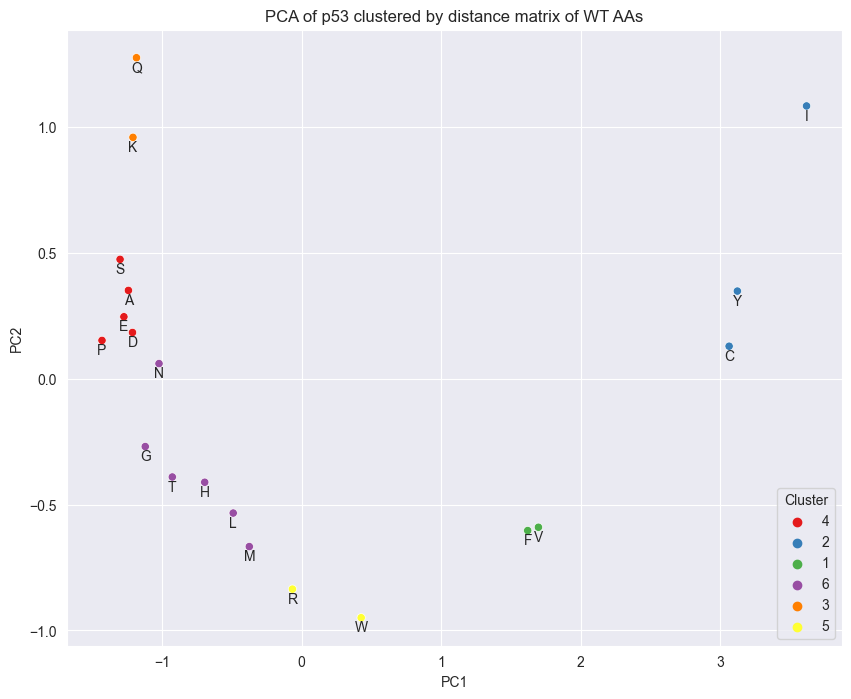

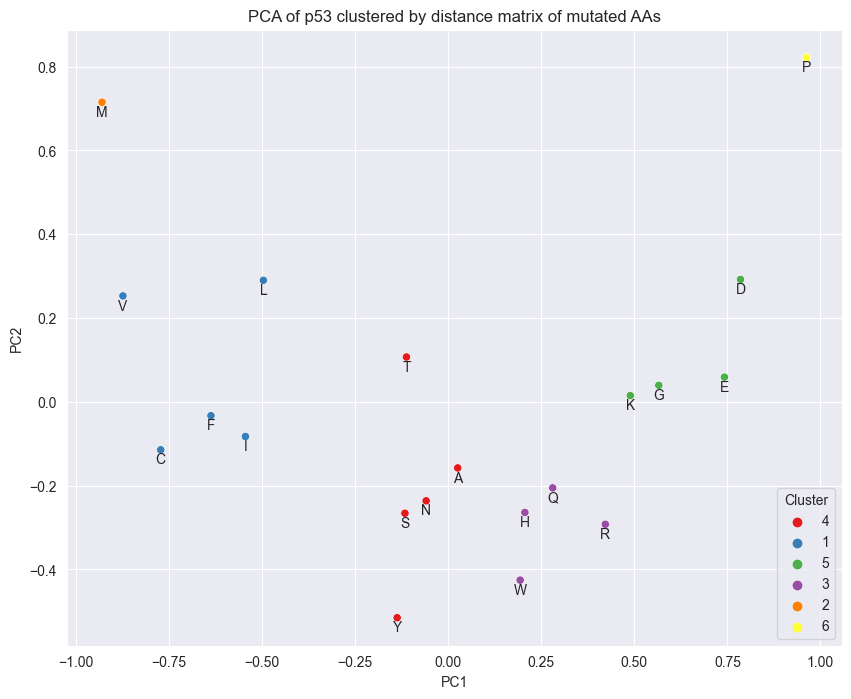

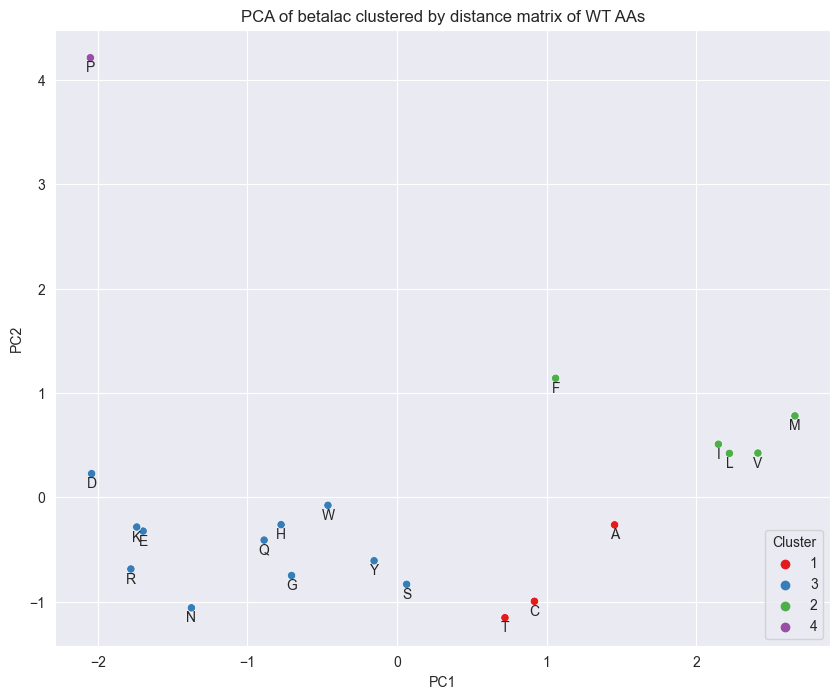

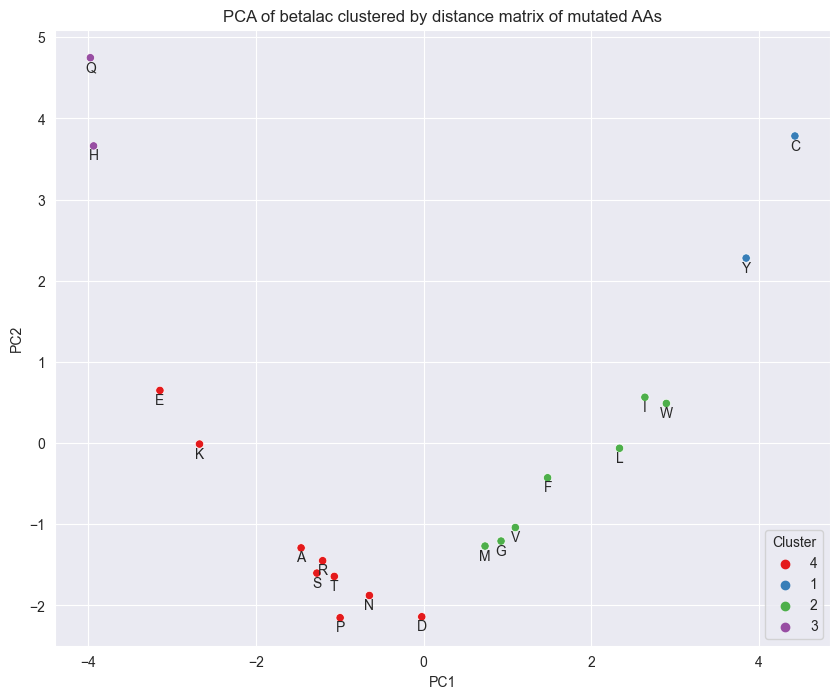

In [9]:
# Plotting, after pca and hierarchical clustering. clusters are defined by the colors shown in the legend.

de.pca_hierarchical_plot(dist_wt_p53, optimal_num_cluster=clusters_by_sil_p53, title = "p53 clustered by distance matrix of WT AAs")
de.pca_hierarchical_plot(dist_mut_p53, optimal_num_cluster=clusters_by_sil_p53, title = "p53 clustered by distance matrix of mutated AAs")

de.pca_hierarchical_plot(dist_wt_betalac, optimal_num_cluster=4, title = "betalac clustered by distance matrix of WT AAs")
de.pca_hierarchical_plot(dist_mut_betalac, optimal_num_cluster=4, title = "betalac clustered by distance matrix of mutated AAs")